# 📱 Telecom X - Parte 2: Predicción de Cancelación (Churn)

## 💡 Acerca del desafío

### 🎯 Misión
Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

### 🧠 Objetivos del Desafío
- Preparar los datos para el modelado (tratamiento, codificación, normalización)
- Realizar análisis de correlación y selección de variables
- Entrenar dos o más modelos de clasificación
- Evaluar el rendimiento de los modelos con métricas
- Interpretar los resultados, incluyendo la importancia de las variables
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación

## 📦 Instalación de librerías necesarias

In [43]:
# Instalación de librerías adicionales si es necesario
!pip install imbalanced-learn -q
!pip install seaborn matplotlib pandas numpy scikit-learn -q

## 📚 Importación de librerías

In [44]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Balanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 📂 Carga de datos

**Nota:** Sube tu archivo de datos aquí. El archivo debe contener información sobre clientes de telecomunicaciones.

In [45]:
# Cargar el archivo de datos
df = pd.read_csv("/content/datos_tratados.csv")

print(f"✅ Datos cargados: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"\nColumnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# Corrección de tipos de datos
print("\n⚙️ Corrigiendo tipos de datos...")

# Convertir 'account.Charges.Total' de string a float
if df['account.Charges.Total'].dtype == 'object':
    # Eliminar espacios y convertir a numérico
    df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
    print("  • 'account.Charges.Total' convertido a numérico")

# Tratar valores faltantes
missing_count = df.isnull().sum().sum()
if missing_count > 0:
    print(f"\n⚠️ Se encontraron {missing_count} valores faltantes")
    print("\nValores faltantes por columna:")
    missing_cols = df.isnull().sum()
    print(missing_cols[missing_cols > 0])

    # Eliminar filas con valores faltantes
    df = df.dropna()
    print(f"\n✅ Filas con valores faltantes eliminadas. Nuevo tamaño: {df.shape[0]} filas")

print("\n" + "="*60)
print("DATASET LISTO PARA ANÁLISIS")
print("="*60)

# Mostrar primeras filas
df.head()

✅ Datos cargados: 7267 filas y 21 columnas

Columnas disponibles:
  1. customerID
  2. Churn
  3. customer.gender
  4. customer.SeniorCitizen
  5. customer.Partner
  6. customer.Dependents
  7. customer.tenure
  8. phone.PhoneService
  9. phone.MultipleLines
  10. internet.InternetService
  11. internet.OnlineSecurity
  12. internet.OnlineBackup
  13. internet.DeviceProtection
  14. internet.TechSupport
  15. internet.StreamingTV
  16. internet.StreamingMovies
  17. account.Contract
  18. account.PaperlessBilling
  19. account.PaymentMethod
  20. account.Charges.Monthly
  21. account.Charges.Total

⚙️ Corrigiendo tipos de datos...
  • 'account.Charges.Total' convertido a numérico

⚠️ Se encontraron 235 valores faltantes

Valores faltantes por columna:
Churn                    224
account.Charges.Total     11
dtype: int64

✅ Filas con valores faltantes eliminadas. Nuevo tamaño: 7032 filas

DATASET LISTO PARA ANÁLISIS


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## 🔍 Exploración inicial de datos

In [46]:
# Información general del dataset
print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)
display(df.describe())

print("\n" + "=" * 60)
print("VALORES FALTANTES")
print("=" * 60)
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✅ No hay valores faltantes")

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport 

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000



VALORES FALTANTES
✅ No hay valores faltantes


# 🛠️ PREPARACIÓN DE LOS DATOS

## 1️⃣ Eliminación de Columnas Irrelevantes

In [47]:
# Identificar columnas a eliminar (como IDs únicos)
# Buscar automáticamente columnas con 'id' en el nombre
columnas_a_eliminar = [col for col in df.columns if 'id' in col.lower()]

# Si no hay columnas con 'id', dejar lista vacía
if not columnas_a_eliminar:
    print("ℹ️ No se encontraron columnas de ID para eliminar")
    df_clean = df.copy()
else:
    print("🗑️ Columnas a eliminar:")
    print(columnas_a_eliminar)
    # Eliminar columnas
    df_clean = df.drop(columns=columnas_a_eliminar)

print(f"\n✅ Dataset después de eliminar columnas: {df_clean.shape}")
print(f"\nColumnas restantes ({len(df_clean.columns)}):")
for i, col in enumerate(df_clean.columns, 1):
    print(f"  {i}. {col}")

🗑️ Columnas a eliminar:
['customerID']

✅ Dataset después de eliminar columnas: (7032, 20)

Columnas restantes (20):
  1. Churn
  2. customer.gender
  3. customer.SeniorCitizen
  4. customer.Partner
  5. customer.Dependents
  6. customer.tenure
  7. phone.PhoneService
  8. phone.MultipleLines
  9. internet.InternetService
  10. internet.OnlineSecurity
  11. internet.OnlineBackup
  12. internet.DeviceProtection
  13. internet.TechSupport
  14. internet.StreamingTV
  15. internet.StreamingMovies
  16. account.Contract
  17. account.PaperlessBilling
  18. account.PaymentMethod
  19. account.Charges.Monthly
  20. account.Charges.Total


## 2️⃣ Encoding de Variables Categóricas

In [48]:
# Identificar columnas categóricas y numéricas
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identificar automáticamente la columna target (churn)
# Buscar columnas que contengan 'churn' en el nombre (case insensitive)
target_candidates = [col for col in df_clean.columns if 'churn' in col.lower()]

if len(target_candidates) == 1:
    target_column = target_candidates[0]
    print(f"✅ Columna target identificada automáticamente: '{target_column}'")
elif len(target_candidates) > 1:
    print(f"⚠️ Se encontraron múltiples columnas con 'churn': {target_candidates}")
    target_column = target_candidates[0]
    print(f"   Usando: '{target_column}' (ajusta si es necesario)")
else:
    print("⚠️ No se encontró columna con 'churn' en el nombre.")
    print(f"   Columnas disponibles: {list(df_clean.columns)}")
    target_column = 'Churn'  # Valor por defecto
    print(f"   Usando valor por defecto: '{target_column}'")
    print("   ⚠️ AJUSTA MANUALMENTE SI ES NECESARIO")

# Verificar valores únicos del target
print(f"\n📊 Valores únicos en '{target_column}': {df_clean[target_column].unique()}")

# Remover la variable target de las categóricas
categorical_cols = [col for col in categorical_cols if col != target_column]

print(f"\n📊 Variables categóricas ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  • {col}")

print(f"\n📈 Variables numéricas ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  • {col}")

print(f"\n🎯 Variable target: {target_column}")

# Aplicar One-Hot Encoding
print("\n⏳ Aplicando One-Hot Encoding...")
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True, dtype=int)

print(f"\n✅ Dataset después del encoding: {df_encoded.shape}")
print(f"Nuevas columnas creadas: {df_encoded.shape[1] - df_clean.shape[1]}")
print(f"Total de features: {df_encoded.shape[1] - 1} (excluyendo target)")

df_encoded.head()

✅ Columna target identificada automáticamente: 'Churn'

📊 Valores únicos en 'Churn': ['No' 'Yes']

📊 Variables categóricas (15):
  • customer.gender
  • customer.Partner
  • customer.Dependents
  • phone.PhoneService
  • phone.MultipleLines
  • internet.InternetService
  • internet.OnlineSecurity
  • internet.OnlineBackup
  • internet.DeviceProtection
  • internet.TechSupport
  • internet.StreamingTV
  • internet.StreamingMovies
  • account.Contract
  • account.PaperlessBilling
  • account.PaymentMethod

📈 Variables numéricas (4):
  • customer.SeniorCitizen
  • customer.tenure
  • account.Charges.Monthly
  • account.Charges.Total

🎯 Variable target: Churn

⏳ Aplicando One-Hot Encoding...

✅ Dataset después del encoding: (7032, 31)
Nuevas columnas creadas: 11
Total de features: 30 (excluyendo target)


,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,No,0,9,65.6,593.30,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1
1,No,0,9,59.9,542.40,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,Yes,0,4,73.9,280.85,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,Yes,1,13,98.0,1237.85,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
4,Yes,1,3,83.9,267.40,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


## 3️⃣ Verificación de la Proporción de Cancelación (Churn)

ANÁLISIS DE BALANCE DE CLASES

Conteo de clases:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Proporción de clases (%)
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


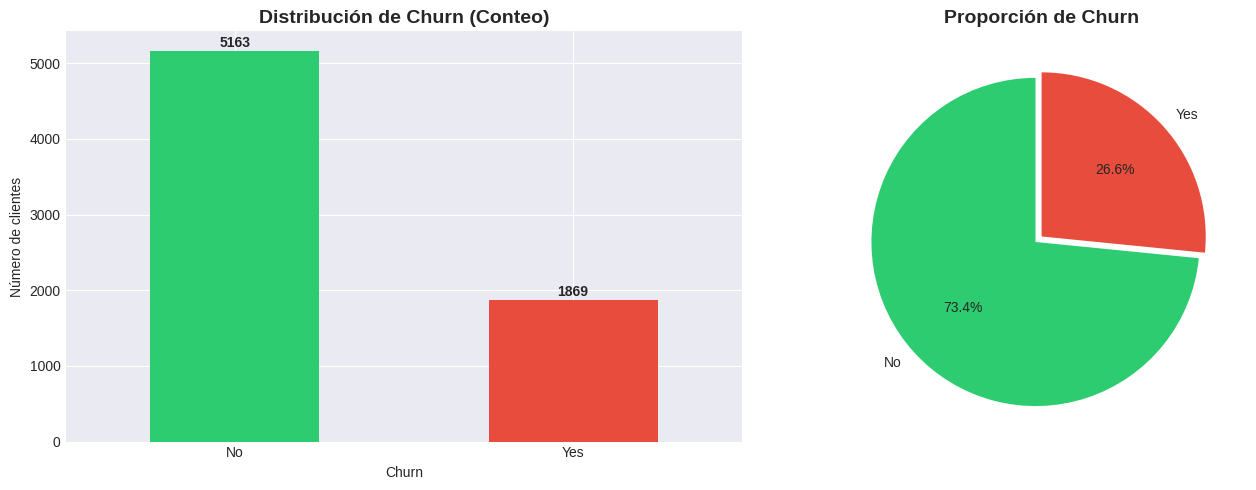


📊 Ratio de desbalance: 2.76:1
✅ Las clases están relativamente balanceadas.


In [49]:
# Calcular proporción de churn
churn_counts = df_encoded[target_column].value_counts()
churn_proportions = df_encoded[target_column].value_counts(normalize=True) * 100

print("=" * 60)
print("ANÁLISIS DE BALANCE DE CLASES")
print("=" * 60)
print("\nConteo de clases:")
print(churn_counts)
print("\nProporción de clases (%)")
print(churn_proportions)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
churn_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Churn (Conteo)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Número de clientes')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Añadir valores en las barras
for i, v in enumerate(churn_counts):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Gráfico de pastel
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=(0.05, 0))
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Evaluación del desbalance
minority_class = churn_counts.min()
majority_class = churn_counts.max()
imbalance_ratio = majority_class / minority_class

print(f"\n📊 Ratio de desbalance: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("⚠️ ADVERTENCIA: Existe un desbalance significativo entre las clases.")
    print("   Se recomienda aplicar técnicas de balanceo (SMOTE, undersampling, etc.)")
else:
    print("✅ Las clases están relativamente balanceadas.")

## 4️⃣ Balanceo de Clases (opcional - aplicar si es necesario)

In [50]:
# IMPORTANTE: Solo ejecuta esta celda si decidiste aplicar balanceo

# Separar features (X) y target (y)
X_temp = df_encoded.drop(columns=[target_column])
y_temp = df_encoded[target_column]

# Convertir target a numérico si es necesario
if y_temp.dtype == 'object':
    le_target = LabelEncoder()
    y_temp = le_target.fit_transform(y_temp)

print("Distribución ANTES del balanceo:")
print(pd.Series(y_temp).value_counts())

# Opción 1: SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_temp, y_temp)

# Opción 2: Undersampling (comenta SMOTE y descomenta esto si prefieres undersampling)
# rus = RandomUnderSampler(random_state=42)
# X_balanced, y_balanced = rus.fit_resample(X_temp, y_temp)

print("\nDistribución DESPUÉS del balanceo:")
print(pd.Series(y_balanced).value_counts())

# Crear DataFrame balanceado
df_balanced = pd.DataFrame(X_balanced, columns=X_temp.columns)
df_balanced[target_column] = y_balanced

print(f"\n✅ Dataset balanceado: {df_balanced.shape}")

# NOTA: Si aplicaste balanceo, usa df_balanced en lugar de df_encoded en las siguientes celdas

Distribución ANTES del balanceo:
0    5163
1    1869
Name: count, dtype: int64

Distribución DESPUÉS del balanceo:
0    5163
1    5163
Name: count, dtype: int64

✅ Dataset balanceado: (10326, 31)


## 5️⃣ Normalización o Estandarización

**Nota:** La normalización se aplicará más adelante solo a los modelos que la requieren (Regresión Logística, KNN, SVM).

In [51]:
# Preparación para normalización
# Identificar las columnas numéricas ANTES del encoding (variables originales)

# Buscar columnas numéricas específicas del dataset
numerical_features = [col for col in df_clean.columns
                     if col in ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total',
                               'customer.SeniorCitizen', 'tenure', 'monthly_charges', 'total_charges']
                     and col != target_column]

# Si no encontró ninguna, usar todas las numéricas del dataset original
if not numerical_features:
    numerical_features = [col for col in numerical_cols if col != target_column]

# Verificar qué columnas numéricas existen en el dataset encoded
numerical_features = [col for col in numerical_features if col in df_encoded.columns]

print(f"📊 Columnas numéricas identificadas para normalización ({len(numerical_features)}):")
for col in numerical_features:
    print(f"  • {col}")

print("\n⏳ La normalización se aplicará durante la fase de modelado según el modelo elegido.")
print("   • Modelos que REQUIEREN normalización: Regresión Logística, KNN, SVM")
print("   • Modelos que NO requieren normalización: Random Forest, Decision Tree")

📊 Columnas numéricas identificadas para normalización (4):
  • customer.SeniorCitizen
  • customer.tenure
  • account.Charges.Monthly
  • account.Charges.Total

⏳ La normalización se aplicará durante la fase de modelado según el modelo elegido.
   • Modelos que REQUIEREN normalización: Regresión Logística, KNN, SVM
   • Modelos que NO requieren normalización: Random Forest, Decision Tree


# 📊 CORRELACIÓN Y SELECCIÓN DE VARIABLES

## 1️⃣ Análisis de Correlación

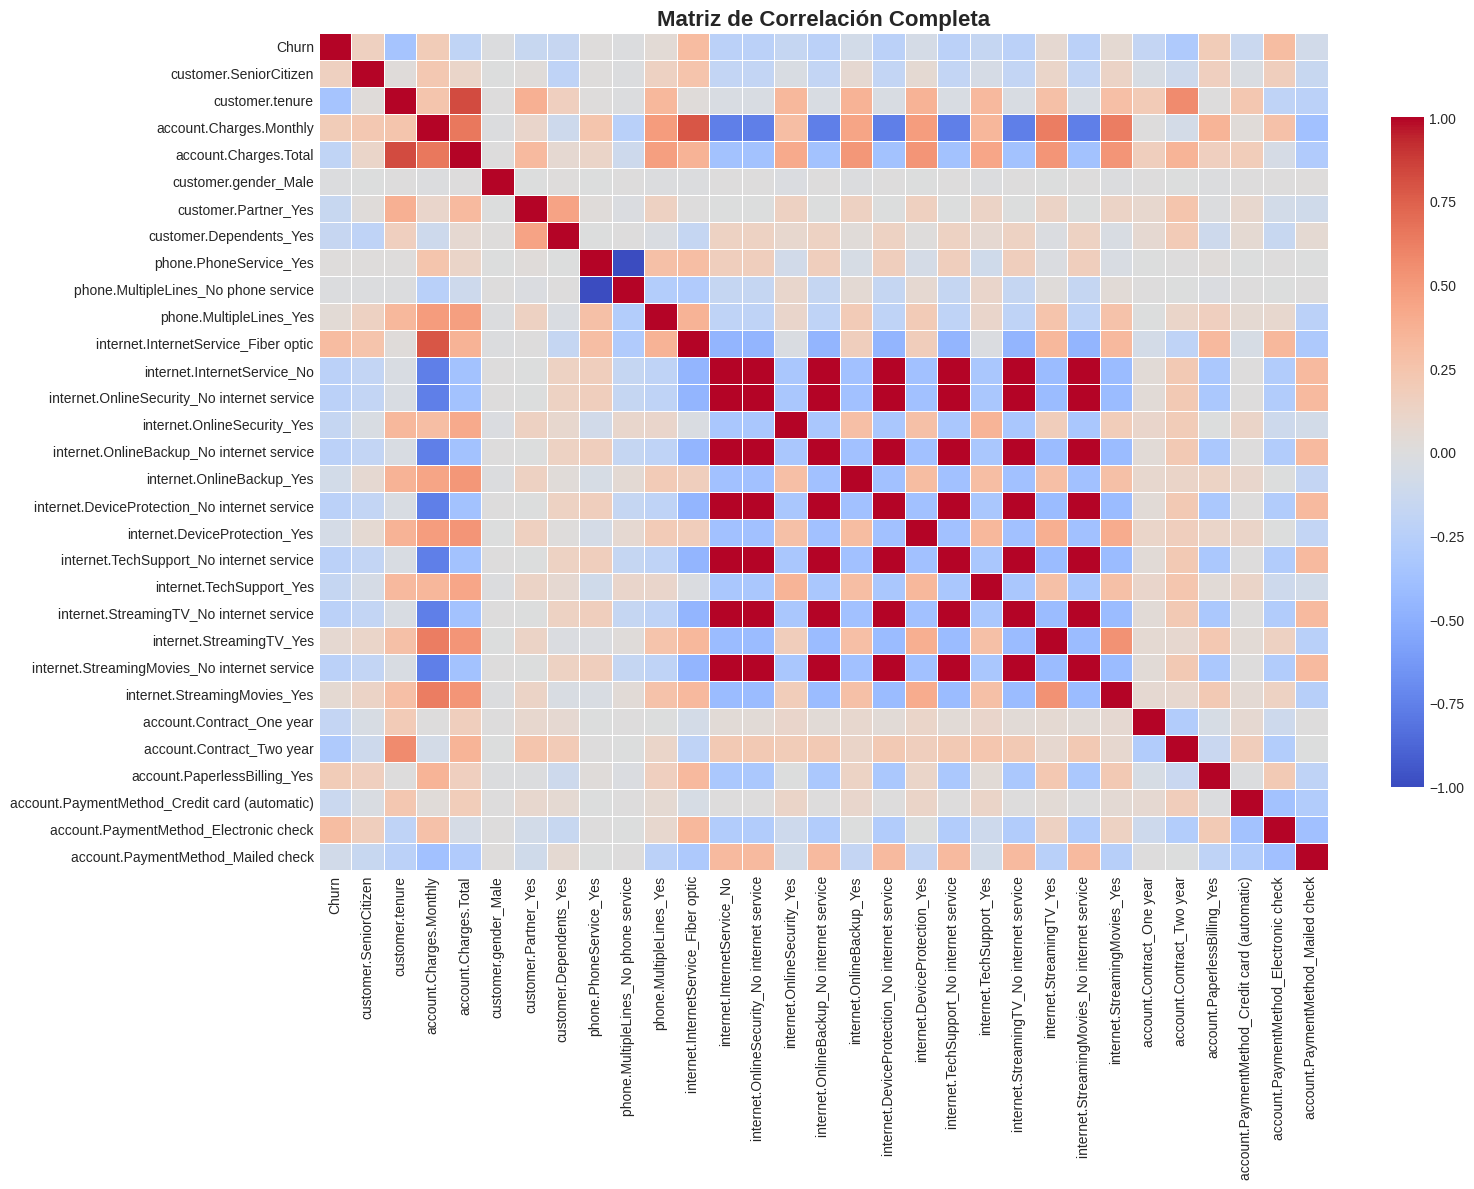

CORRELACIÓN CON LA VARIABLE TARGET (CHURN)
Churn                                            1.000000
internet.InternetService_Fiber optic             0.307463
account.PaymentMethod_Electronic check           0.301455
account.Charges.Monthly                          0.192858
account.PaperlessBilling_Yes                     0.191454
customer.SeniorCitizen                           0.150541
internet.StreamingTV_Yes                         0.063254
internet.StreamingMovies_Yes                     0.060860
phone.MultipleLines_Yes                          0.040033
phone.PhoneService_Yes                           0.011691
customer.gender_Male                            -0.008545
phone.MultipleLines_No phone service            -0.011691
internet.DeviceProtection_Yes                   -0.066193
internet.OnlineBackup_Yes                       -0.082307
account.PaymentMethod_Mailed check              -0.090773
account.PaymentMethod_Credit card (automatic)   -0.134687
customer.Partner_Yes         

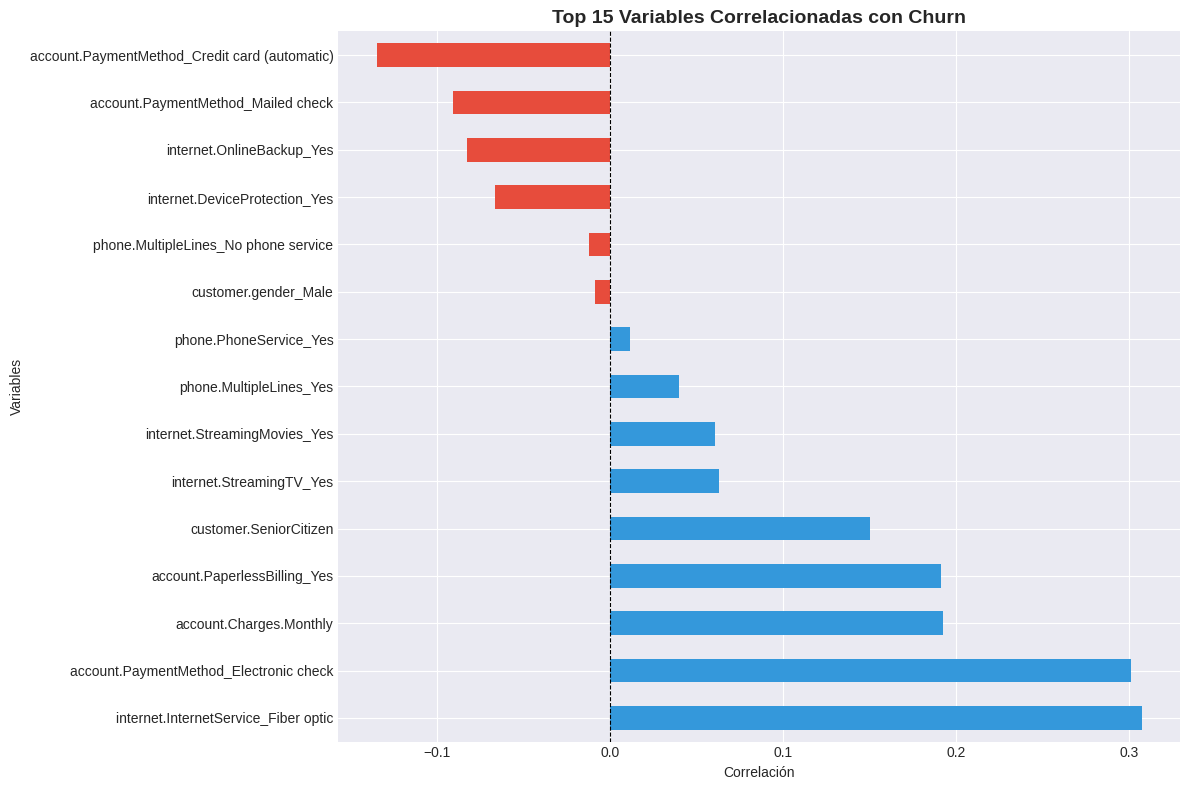


⚠️ PARES DE VARIABLES CON ALTA CORRELACIÓN (posible multicolinealidad):
  • customer.tenure <-> account.Charges.Total: 0.826
  • phone.PhoneService_Yes <-> phone.MultipleLines_No phone service: -1.000
  • internet.InternetService_No <-> internet.OnlineSecurity_No internet service: 1.000
  • internet.InternetService_No <-> internet.OnlineBackup_No internet service: 1.000
  • internet.InternetService_No <-> internet.DeviceProtection_No internet service: 1.000
  • internet.InternetService_No <-> internet.TechSupport_No internet service: 1.000
  • internet.InternetService_No <-> internet.StreamingTV_No internet service: 1.000
  • internet.InternetService_No <-> internet.StreamingMovies_No internet service: 1.000
  • internet.OnlineSecurity_No internet service <-> internet.OnlineBackup_No internet service: 1.000
  • internet.OnlineSecurity_No internet service <-> internet.DeviceProtection_No internet service: 1.000
  • internet.OnlineSecurity_No internet service <-> internet.TechSupport_No

In [52]:
# Preparar datos para análisis de correlación
# Convertir target a numérico si es necesario
df_corr = df_encoded.copy()

if df_corr[target_column].dtype == 'object':
    df_corr[target_column] = df_corr[target_column].map({'No': 0, 'Yes': 1})

# Calcular matriz de correlación
correlation_matrix = df_corr.corr()

# Visualizar matriz de correlación completa
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación Completa', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlación con la variable target
correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)

print("=" * 60)
print("CORRELACIÓN CON LA VARIABLE TARGET (CHURN)")
print("=" * 60)
print(correlation_with_target)

# Visualizar las 15 variables más correlacionadas con churn
top_correlations = correlation_with_target.drop(target_column).head(15)

plt.figure(figsize=(12, 8))
top_correlations.plot(kind='barh', color=['#e74c3c' if x < 0 else '#3498db' for x in top_correlations])
plt.title('Top 15 Variables Correlacionadas con Churn', fontsize=14, fontweight='bold')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# Identificar variables altamente correlacionadas (posible multicolinealidad)
high_corr_threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("\n⚠️ PARES DE VARIABLES CON ALTA CORRELACIÓN (posible multicolinealidad):")
    for var1, var2, corr in high_corr_pairs:
        print(f"  • {var1} <-> {var2}: {corr:.3f}")
else:
    print("\n✅ No se detectaron problemas de multicolinealidad significativos.")

## 2️⃣ Análisis Dirigido

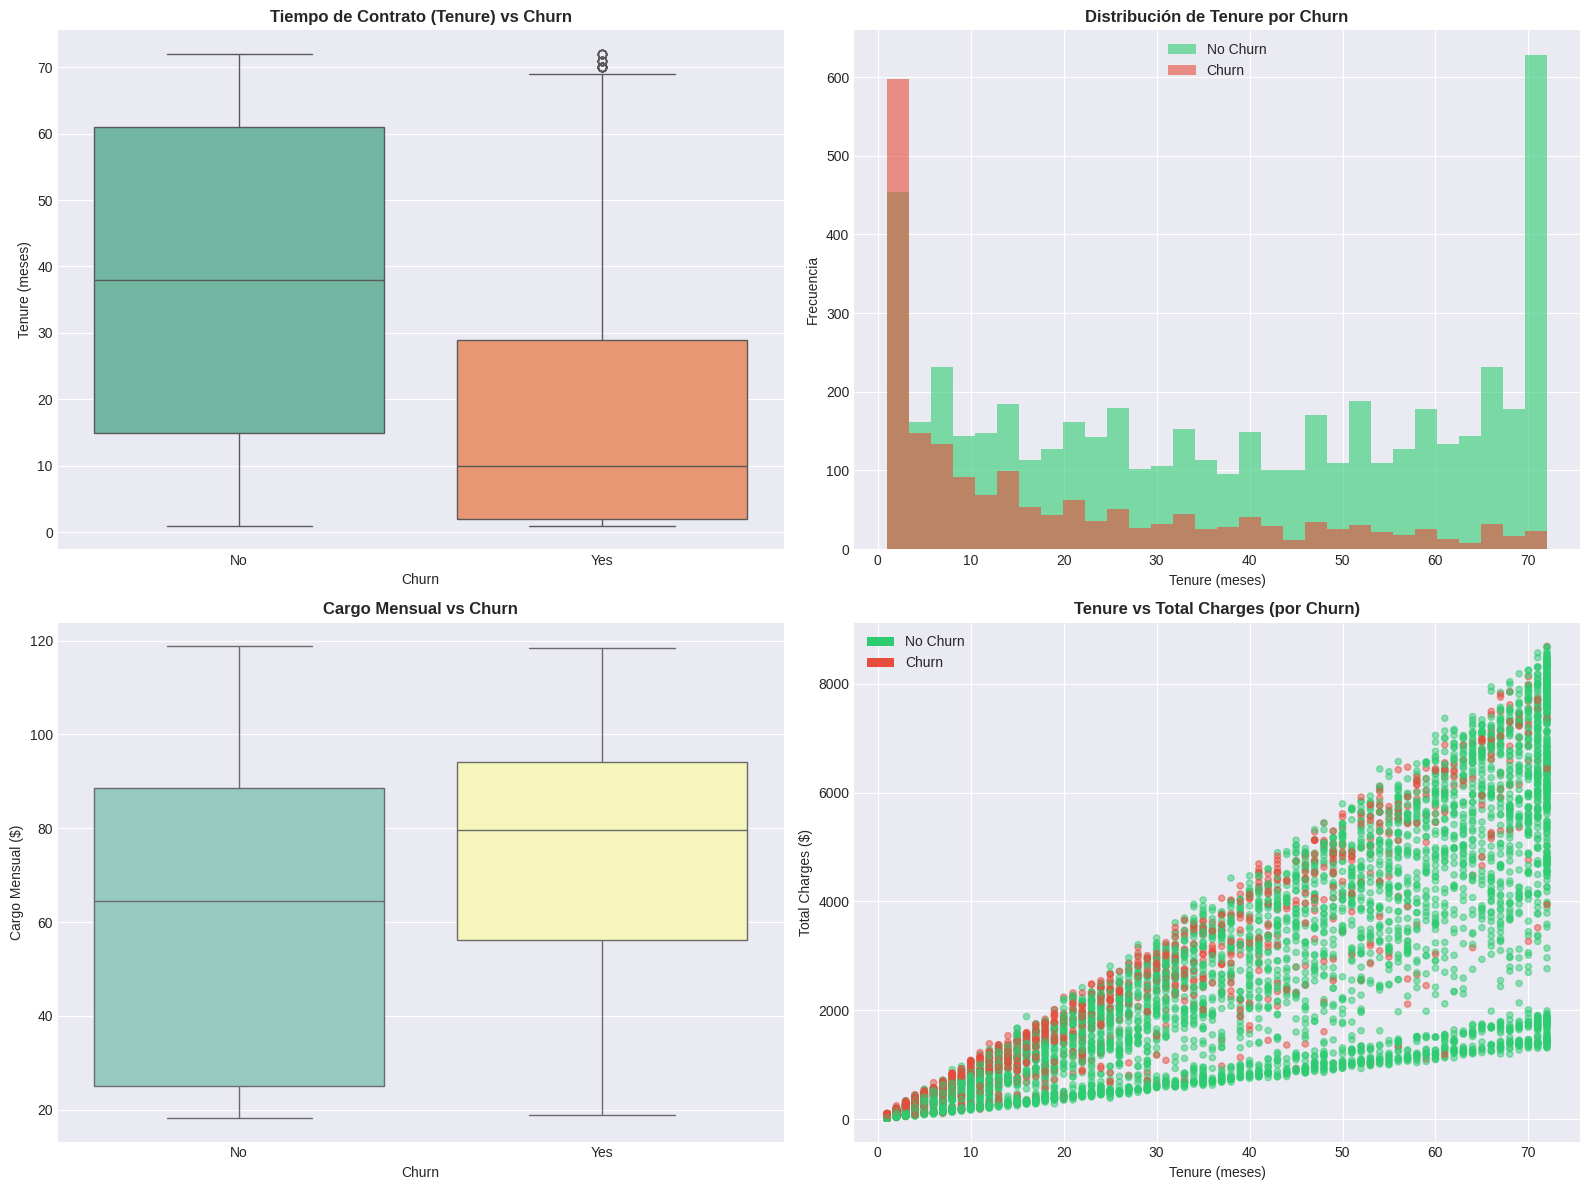

ESTADÍSTICAS POR GRUPO DE CHURN

CUSTOMER.TENURE:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

ACCOUNT.CHARGES.MONTHLY:
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
No     5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35

ACCOUNT.CHARGES.TOTAL:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
N

In [53]:
# Análisis de variables específicas vs Churn

# Preparar datos para visualización
df_viz = df.copy()

# Identificar las columnas numéricas principales
tenure_col = 'customer.tenure' if 'customer.tenure' in df_viz.columns else 'tenure'
monthly_col = 'account.Charges.Monthly' if 'account.Charges.Monthly' in df_viz.columns else 'monthly_charges'
total_col = 'account.Charges.Total' if 'account.Charges.Total' in df_viz.columns else 'total_charges'

# 1. Análisis visual
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot: Tenure vs Churn
sns.boxplot(data=df_viz, x=target_column, y=tenure_col, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Tiempo de Contrato (Tenure) vs Churn', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('Tenure (meses)')

# Histograma: Distribución de Tenure por Churn
df_viz[df_viz[target_column] == 'No'][tenure_col].hist(bins=30, alpha=0.6, label='No Churn', ax=axes[0, 1], color='#2ecc71')
df_viz[df_viz[target_column] == 'Yes'][tenure_col].hist(bins=30, alpha=0.6, label='Churn', ax=axes[0, 1], color='#e74c3c')
axes[0, 1].set_title('Distribución de Tenure por Churn', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Tenure (meses)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].legend()

# 2. Monthly Charges vs Churn
sns.boxplot(data=df_viz, x=target_column, y=monthly_col, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('Cargo Mensual vs Churn', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Churn')
axes[1, 0].set_ylabel('Cargo Mensual ($)')

# Scatter plot: Total Charges vs Tenure coloreado por Churn
churn_colors = df_viz[target_column].map({'No': '#2ecc71', 'Yes': '#e74c3c'})
axes[1, 1].scatter(df_viz[tenure_col], df_viz[total_col],
                   c=churn_colors, alpha=0.5, s=20)
axes[1, 1].set_title('Tenure vs Total Charges (por Churn)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tenure (meses)')
axes[1, 1].set_ylabel('Total Charges ($)')

# Crear leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ecc71', label='No Churn'),
                   Patch(facecolor='#e74c3c', label='Churn')]
axes[1, 1].legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas por grupo
print("=" * 60)
print("ESTADÍSTICAS POR GRUPO DE CHURN")
print("=" * 60)

for var in [tenure_col, monthly_col, total_col]:
    print(f"\n{var.upper()}:")
    print(df_viz.groupby(target_column)[var].describe())

# 🤖 MODELADO PREDICTIVO

## 1️⃣ Separación de Datos

In [54]:
# Decidir si usar datos balanceados o no
# Descomenta la línea siguiente si aplicaste balanceo
# df_model = df_balanced

# Si NO aplicaste balanceo, usa:
df_model = df_encoded.copy()

# Separar features (X) y target (y)
X = df_model.drop(columns=[target_column])
y = df_model[target_column]

# Convertir target a numérico si es necesario
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    target_names = le.classes_
    print(f"✅ Target codificado: {dict(zip(range(len(target_names)), target_names))}")
else:
    target_names = ['No', 'Yes']

# División de datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 60)
print("DIVISIÓN DE DATOS")
print("=" * 60)
print(f"📊 Total de registros: {len(X)}")
print(f"📚 Conjunto de entrenamiento: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"🧪 Conjunto de prueba: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"📈 Número de features: {X.shape[1]}")

print("\n✅ Datos preparados para el modelado")

✅ Target codificado: {0: 'No', 1: 'Yes'}
DIVISIÓN DE DATOS
📊 Total de registros: 7032
📚 Conjunto de entrenamiento: 5625 (80.0%)
🧪 Conjunto de prueba: 1407 (20.0%)
📈 Número de features: 30

✅ Datos preparados para el modelado


## 2️⃣ Creación de Modelos

Vamos a entrenar múltiples modelos:
- **Regresión Logística** (requiere normalización)
- **K-Nearest Neighbors (KNN)** (requiere normalización)
- **Random Forest** (no requiere normalización)
- **Decision Tree** (no requiere normalización)

In [55]:
# Preparar datos normalizados para modelos que lo requieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos normalizados con StandardScaler")
print("   (Solo se aplicará a modelos que requieren normalización)\n")

# Diccionario para almacenar modelos y resultados
models = {}
results = {}

print("=" * 60)
print("ENTRENAMIENTO DE MODELOS")
print("=" * 60)

✅ Datos normalizados con StandardScaler
   (Solo se aplicará a modelos que requieren normalización)

ENTRENAMIENTO DE MODELOS


### 🔵 Modelo 1: Regresión Logística (con normalización)

In [56]:
print("\n🔵 Entrenando Regresión Logística...")

# Crear y entrenar el modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Guardar modelo
models['Logistic Regression'] = {
    'model': log_reg,
    'predictions': y_pred_log,
    'probabilities': y_pred_proba_log,
    'scaled': True
}

print("✅ Regresión Logística entrenada exitosamente")


🔵 Entrenando Regresión Logística...
✅ Regresión Logística entrenada exitosamente


### 🟢 Modelo 2: K-Nearest Neighbors (con normalización)

In [57]:
print("\n🟢 Entrenando K-Nearest Neighbors...")

# Crear y entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Guardar modelo
models['KNN'] = {
    'model': knn,
    'predictions': y_pred_knn,
    'probabilities': y_pred_proba_knn,
    'scaled': True
}

print("✅ KNN entrenado exitosamente")


🟢 Entrenando K-Nearest Neighbors...
✅ KNN entrenado exitosamente


### 🟠 Modelo 3: Random Forest (sin normalización)

In [58]:
print("\n🟠 Entrenando Random Forest...")

# Crear y entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Guardar modelo
models['Random Forest'] = {
    'model': rf,
    'predictions': y_pred_rf,
    'probabilities': y_pred_proba_rf,
    'scaled': False
}

print("✅ Random Forest entrenado exitosamente")


🟠 Entrenando Random Forest...
✅ Random Forest entrenado exitosamente


### 🔴 Modelo 4: Decision Tree (sin normalización)

In [59]:
print("\n🔴 Entrenando Decision Tree...")

# Crear y entrenar el modelo
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

# Guardar modelo
models['Decision Tree'] = {
    'model': dt,
    'predictions': y_pred_dt,
    'probabilities': y_pred_proba_dt,
    'scaled': False
}

print("✅ Decision Tree entrenado exitosamente")
print("\n" + "=" * 60)
print(f"✅ TODOS LOS MODELOS ENTRENADOS ({len(models)} modelos)")
print("=" * 60)


🔴 Entrenando Decision Tree...
✅ Decision Tree entrenado exitosamente

✅ TODOS LOS MODELOS ENTRENADOS (4 modelos)


## 3️⃣ Evaluación de los Modelos

In [60]:
# Función para evaluar un modelo
def evaluate_model(y_true, y_pred, y_proba, model_name):
    """
    Evalúa un modelo de clasificación y retorna las métricas principales
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_proba)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Evaluar todos los modelos
print("=" * 60)
print("EVALUACIÓN DE MODELOS")
print("=" * 60)

results_list = []

for model_name, model_info in models.items():
    print(f"\n📊 Evaluando {model_name}...")

    metrics = evaluate_model(
        y_test,
        model_info['predictions'],
        model_info['probabilities'],
        model_name
    )

    results_list.append(metrics)

    # Mostrar métricas
    print(f"  • Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"  • Precision: {metrics['Precision']:.4f}")
    print(f"  • Recall:    {metrics['Recall']:.4f}")
    print(f"  • F1-Score:  {metrics['F1-Score']:.4f}")
    print(f"  • ROC-AUC:   {metrics['ROC-AUC']:.4f}")

# Crear DataFrame con resultados
results_df = pd.DataFrame(results_list)
results_df = results_df.set_index('Model')

print("\n" + "=" * 60)
print("TABLA COMPARATIVA DE MÉTRICAS")
print("=" * 60)
display(results_df.style.background_gradient(cmap='RdYlGn', axis=0))

EVALUACIÓN DE MODELOS

📊 Evaluando Logistic Regression...
  • Accuracy:  0.8017
  • Precision: 0.6578
  • Recall:    0.5294
  • F1-Score:  0.5867
  • ROC-AUC:   0.8451

📊 Evaluando KNN...
  • Accuracy:  0.7605
  • Precision: 0.5543
  • Recall:    0.5053
  • F1-Score:  0.5287
  • ROC-AUC:   0.7765

📊 Evaluando Random Forest...
  • Accuracy:  0.7960
  • Precision: 0.6593
  • Recall:    0.4813
  • F1-Score:  0.5564
  • ROC-AUC:   0.8398

📊 Evaluando Decision Tree...
  • Accuracy:  0.7633
  • Precision: 0.5668
  • Recall:    0.4652
  • F1-Score:  0.5110
  • ROC-AUC:   0.7363

TABLA COMPARATIVA DE MÉTRICAS


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Logistic Regression,0.801706,0.657807,0.529412,0.586667,0.845145
KNN,0.760483,0.554252,0.505348,0.528671,0.776464
Random Forest,0.796020,0.659341,0.481283,0.556414,0.839816
Decision Tree,0.763326,0.566775,0.465241,0.511013,0.736317


### 📊 Visualización Comparativa de Métricas

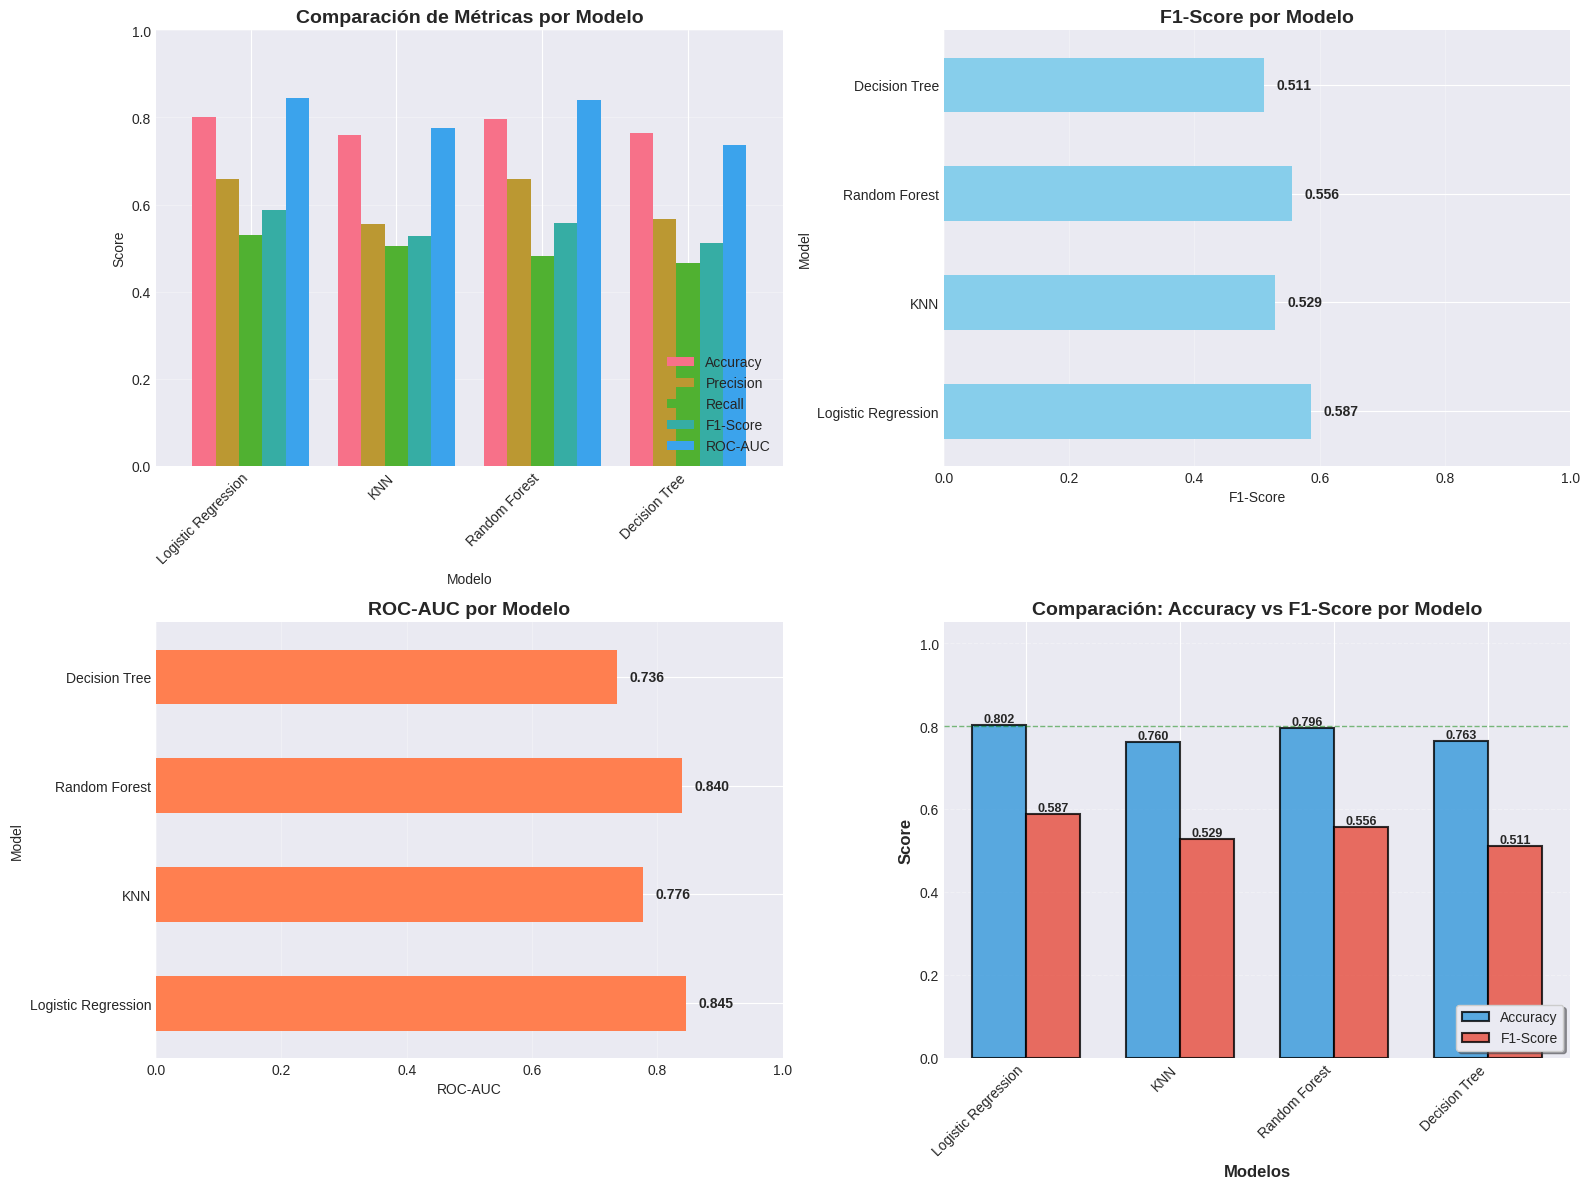


MEJORES MODELOS POR METRICA

[*] Mejor F1-Score:  Logistic Regression
    Score: 0.5867

[*] Mejor Accuracy:  Logistic Regression
    Score: 0.8017

[*] Mejor ROC-AUC:   Logistic Regression
    Score: 0.8451



In [61]:
# Visualización de métricas comparativas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparación de todas las métricas
results_df.plot(kind='bar', ax=axes[0, 0], width=0.8)
axes[0, 0].set_title('Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Modelo')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].legend(loc='lower right')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(axis='y', alpha=0.3)

# Gráfico 2: F1-Score comparativo
results_df['F1-Score'].plot(kind='barh', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('F1-Score por Modelo', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_xlim([0, 1])
axes[0, 1].grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(results_df['F1-Score']):
    axes[0, 1].text(v + 0.02, i, f'{v:.3f}', va='center', fontweight='bold')

# Gráfico 3: ROC-AUC comparativo
results_df['ROC-AUC'].plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('ROC-AUC por Modelo', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('ROC-AUC')
axes[1, 0].set_xlim([0, 1])
axes[1, 0].grid(axis='x', alpha=0.3)

for i, v in enumerate(results_df['ROC-AUC']):
    axes[1, 0].text(v + 0.02, i, f'{v:.3f}', va='center', fontweight='bold')

# Gráfico 4: NUEVA VERSIÓN - Comparación directa Accuracy vs F1-Score (MÁS CLARA)
x = np.arange(len(results_df.index))  # Posiciones de las barras
width = 0.35  # Ancho de las barras

# Crear barras para Accuracy
bars1 = axes[1, 1].bar(x - width/2, results_df['Accuracy'], width,
                       label='Accuracy', color='#3498db', alpha=0.8,
                       edgecolor='black', linewidth=1.5)

# Crear barras para F1-Score
bars2 = axes[1, 1].bar(x + width/2, results_df['F1-Score'], width,
                       label='F1-Score', color='#e74c3c', alpha=0.8,
                       edgecolor='black', linewidth=1.5)

# Añadir valores encima de cada barra
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.3f}',
                       ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configuración del gráfico
axes[1, 1].set_title('Comparación: Accuracy vs F1-Score por Modelo', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Modelos', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1, 1].legend(loc='lower right', fontsize=10, frameon=True, shadow=True)
axes[1, 1].set_ylim([0, 1.05])
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')

# Añadir línea de referencia en 0.8
axes[1, 1].axhline(y=0.8, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Umbral 0.8')

plt.tight_layout()
plt.show()

# Identificar el mejor modelo
best_model_f1 = results_df['F1-Score'].idxmax()
best_model_accuracy = results_df['Accuracy'].idxmax()
best_model_roc = results_df['ROC-AUC'].idxmax()

print("\n" + "=" * 60)
print("MEJORES MODELOS POR METRICA")
print("=" * 60)
print(f"\n[*] Mejor F1-Score:  {best_model_f1}")
print(f"    Score: {results_df.loc[best_model_f1, 'F1-Score']:.4f}")

print(f"\n[*] Mejor Accuracy:  {best_model_accuracy}")
print(f"    Score: {results_df.loc[best_model_accuracy, 'Accuracy']:.4f}")

print(f"\n[*] Mejor ROC-AUC:   {best_model_roc}")
print(f"    Score: {results_df.loc[best_model_roc, 'ROC-AUC']:.4f}")
print("\n" + "=" * 60)

### 🎯 Matrices de Confusión

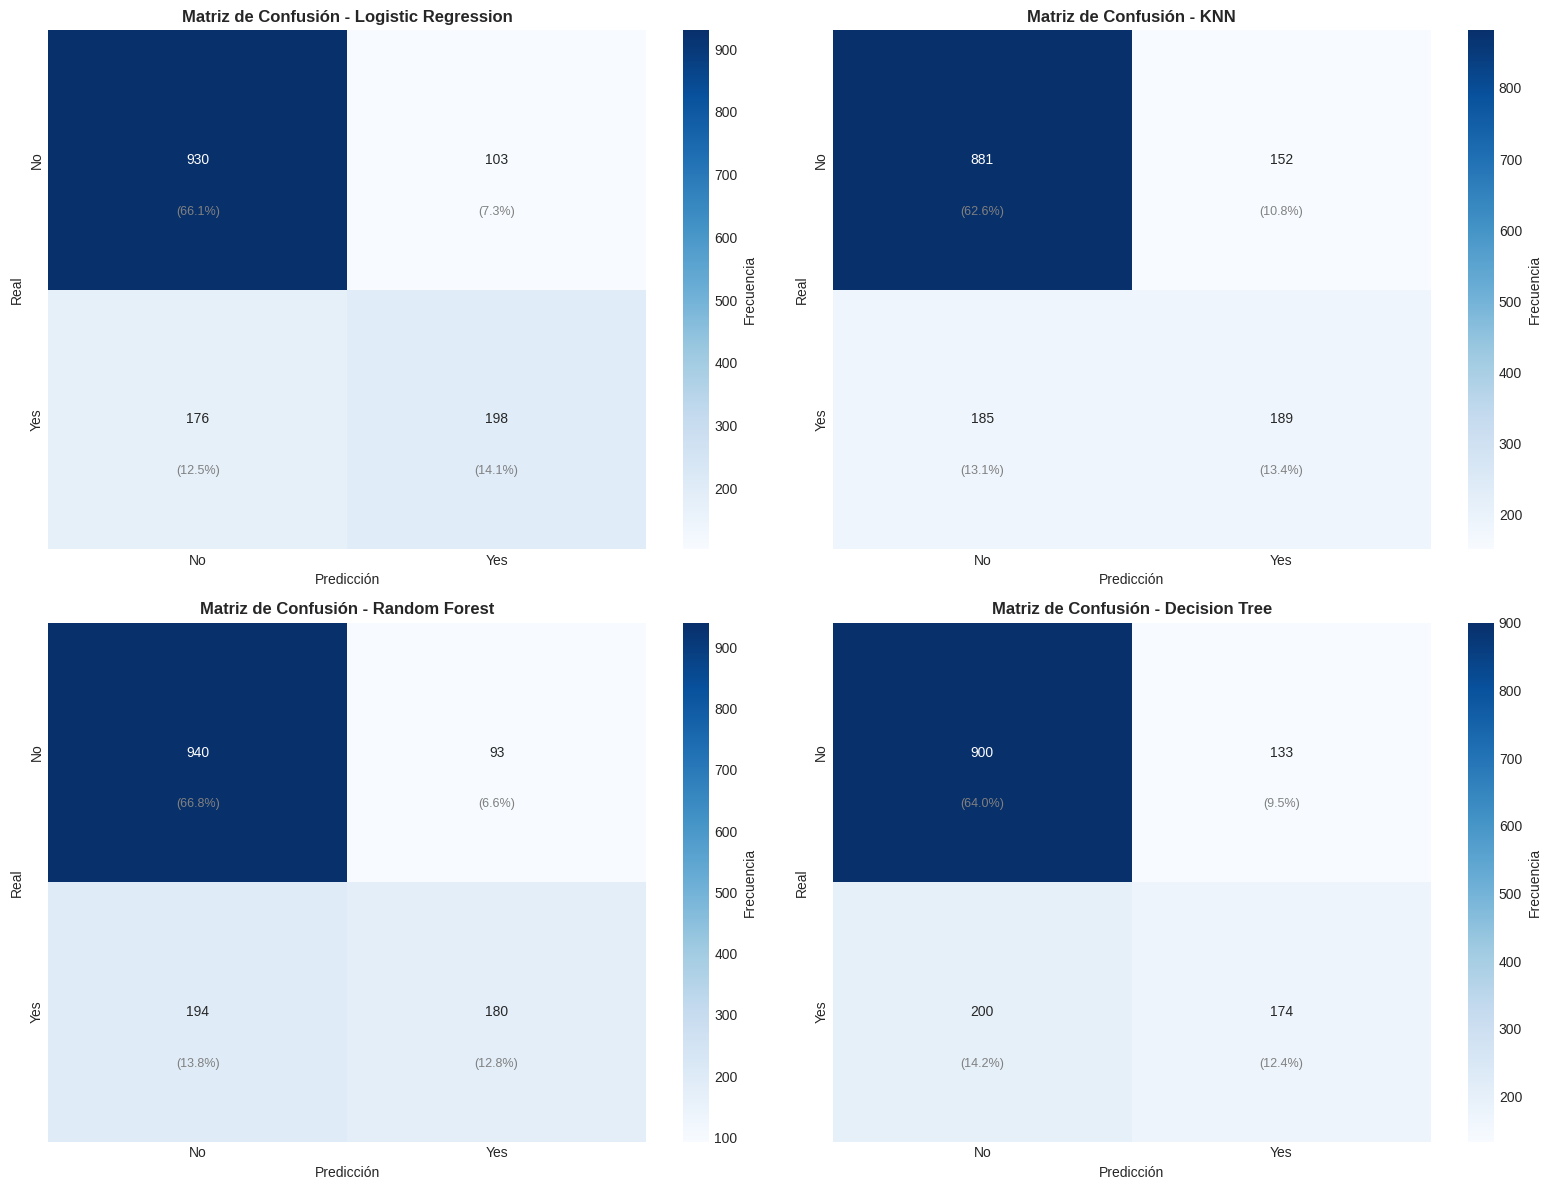

In [62]:
# Visualizar matrices de confusión para todos los modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, (model_name, model_info) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model_info['predictions'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=target_names, yticklabels=target_names,
                cbar_kws={'label': 'Frecuencia'})

    axes[idx].set_title(f'Matriz de Confusión - {model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Real')

    # Añadir porcentajes
    total = cm.sum()
    for i in range(2):
        for j in range(2):
            percentage = cm[i, j] / total * 100
            axes[idx].text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                          ha='center', va='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

### 📈 Curvas ROC

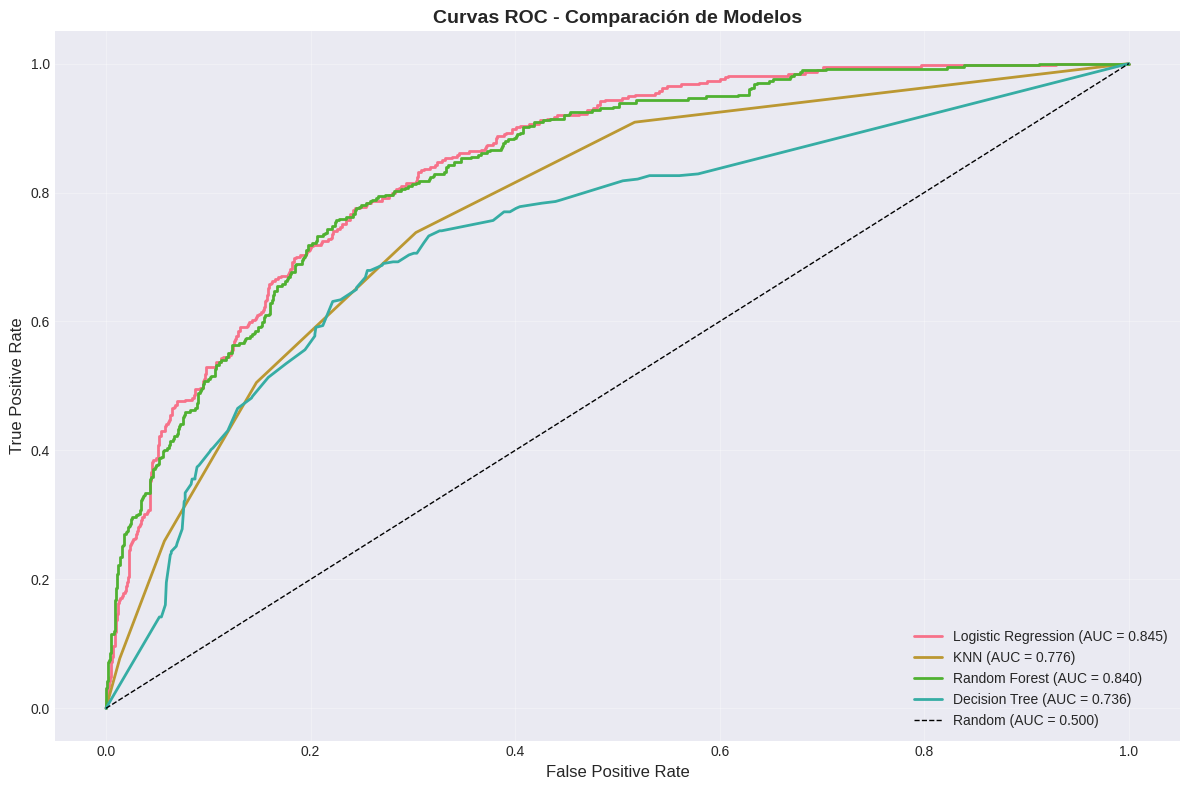

In [63]:
# Visualizar curvas ROC
plt.figure(figsize=(12, 8))

for model_name, model_info in models.items():
    fpr, tpr, _ = roc_curve(y_test, model_info['probabilities'])
    roc_auc = roc_auc_score(y_test, model_info['probabilities'])

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 📋 Reportes de Clasificación Detallados

In [64]:
# Mostrar reportes de clasificación detallados
for model_name, model_info in models.items():
    print("=" * 60)
    print(f"REPORTE DE CLASIFICACIÓN - {model_name}")
    print("=" * 60)
    print(classification_report(y_test, model_info['predictions'],
                                target_names=target_names))
    print()

REPORTE DE CLASIFICACIÓN - Logistic Regression
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1033
         Yes       0.66      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407


REPORTE DE CLASIFICACIÓN - KNN
              precision    recall  f1-score   support

          No       0.83      0.85      0.84      1033
         Yes       0.55      0.51      0.53       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407


REPORTE DE CLASIFICACIÓN - Random Forest
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macr

## 4️⃣ Análisis de Overfitting/Underfitting

ANÁLISIS DE OVERFITTING/UNDERFITTING

📊 Logistic Regression:
  • Train Accuracy: 0.8075
  • Test Accuracy:  0.8017
  • Diferencia:     0.0058
  ✅ El modelo tiene un buen balance entre sesgo y varianza

📊 KNN:
  • Train Accuracy: 0.8334
  • Test Accuracy:  0.7605
  • Diferencia:     0.0729
  ✅ El modelo tiene un buen balance entre sesgo y varianza

📊 Random Forest:
  • Train Accuracy: 0.8651
  • Test Accuracy:  0.7960
  • Diferencia:     0.0690
  ✅ El modelo tiene un buen balance entre sesgo y varianza

📊 Decision Tree:
  • Train Accuracy: 0.8720
  • Test Accuracy:  0.7633
  • Diferencia:     0.1087
  ⚠️ OVERFITTING detectado - El modelo aprende demasiado de los datos de entrenamiento
     Sugerencias: Reducir complejidad, usar regularización, aumentar datos


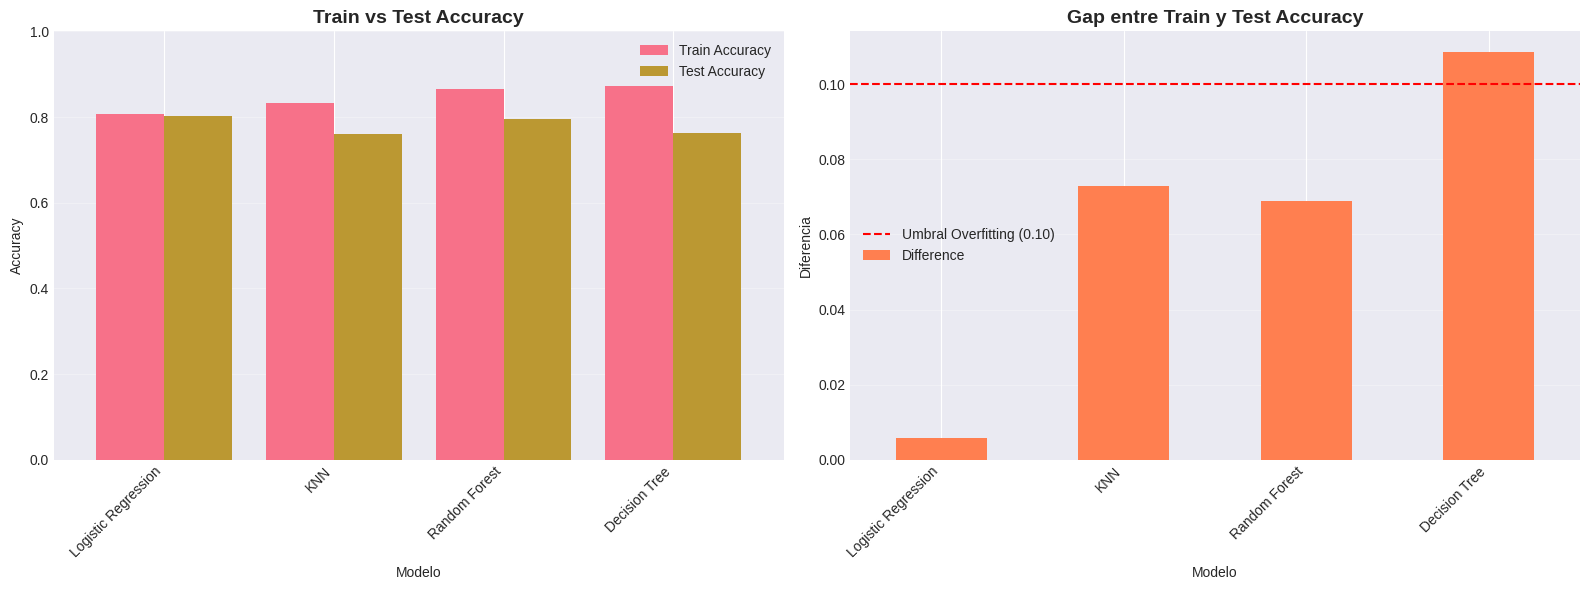

In [65]:
# Evaluar overfitting comparando train vs test accuracy
print("=" * 60)
print("ANÁLISIS DE OVERFITTING/UNDERFITTING")
print("=" * 60)

train_test_comparison = []

for model_name, model_info in models.items():
    model = model_info['model']

    # Obtener predicciones en train
    if model_info['scaled']:
        y_train_pred = model.predict(X_train_scaled)
    else:
        y_train_pred = model.predict(X_train)

    # Calcular accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, model_info['predictions'])
    difference = train_accuracy - test_accuracy

    train_test_comparison.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Difference': difference
    })

    # Análisis
    print(f"\n📊 {model_name}:")
    print(f"  • Train Accuracy: {train_accuracy:.4f}")
    print(f"  • Test Accuracy:  {test_accuracy:.4f}")
    print(f"  • Diferencia:     {difference:.4f}")

    if difference > 0.10:
        print("  ⚠️ OVERFITTING detectado - El modelo aprende demasiado de los datos de entrenamiento")
        print("     Sugerencias: Reducir complejidad, usar regularización, aumentar datos")
    elif test_accuracy < 0.65:
        print("  ⚠️ UNDERFITTING detectado - El modelo no captura bien los patrones")
        print("     Sugerencias: Aumentar complejidad del modelo, añadir más features")
    else:
        print("  ✅ El modelo tiene un buen balance entre sesgo y varianza")

# Visualización
comparison_df = pd.DataFrame(train_test_comparison)
comparison_df = comparison_df.set_index('Model')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Train vs Test Accuracy
comparison_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Train vs Test Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Modelo')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Diferencia (gap)
comparison_df['Difference'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Gap entre Train y Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Modelo')
axes[1].set_ylabel('Diferencia')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].axhline(y=0.10, color='red', linestyle='--', label='Umbral Overfitting (0.10)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 🔍 INTERPRETACIÓN Y CONCLUSIONES

## 1️⃣ Análisis de la Importancia de las Variables

### 🌲 Importancia de Variables - Random Forest

IMPORTANCIA DE VARIABLES - RANDOM FOREST
                                          Feature  Importance
1                                 customer.tenure    0.188044
3                           account.Charges.Total    0.158579
2                         account.Charges.Monthly    0.126055
10           internet.InternetService_Fiber optic    0.068467
28         account.PaymentMethod_Electronic check    0.063676
25                      account.Contract_Two year    0.051790
13                    internet.OnlineSecurity_Yes    0.035551
24                      account.Contract_One year    0.031572
19                       internet.TechSupport_Yes    0.027624
26                   account.PaperlessBilling_Yes    0.021697
12    internet.OnlineSecurity_No internet service    0.016630
0                          customer.SeniorCitizen    0.016339
4                            customer.gender_Male    0.016247
16  internet.DeviceProtection_No internet service    0.015488
6                         cus

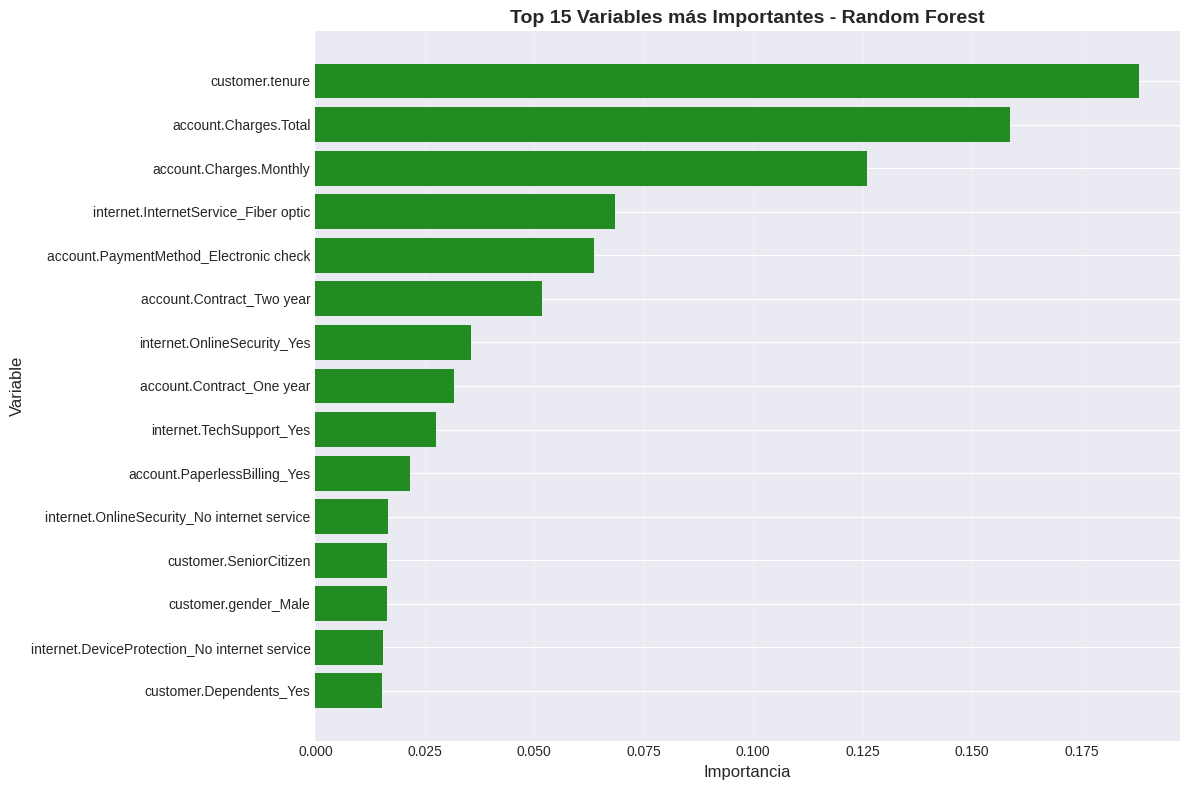

In [66]:
# Importancia de variables en Random Forest
rf_model = models['Random Forest']['model']
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 60)
print("IMPORTANCIA DE VARIABLES - RANDOM FOREST")
print("=" * 60)
print(feature_importance_rf.head(15))

# Visualización
plt.figure(figsize=(12, 8))
top_features_rf = feature_importance_rf.head(15)
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'], color='forestgreen')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Top 15 Variables más Importantes - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Coeficientes - Regresión Logística


COEFICIENTES - REGRESIÓN LOGÍSTICA
                                          Feature  Coefficient
1                                 customer.tenure    -1.312513
3                           account.Charges.Total     0.611552
10           internet.InternetService_Fiber optic     0.586406
25                      account.Contract_Two year    -0.564971
2                         account.Charges.Monthly    -0.533799
24                      account.Contract_One year    -0.290872
21                       internet.StreamingTV_Yes     0.216805
26                   account.PaperlessBilling_Yes     0.181248
28         account.PaymentMethod_Electronic check     0.167630
19                       internet.TechSupport_Yes    -0.161498
23                   internet.StreamingMovies_Yes     0.148202
9                         phone.MultipleLines_Yes     0.146953
13                    internet.OnlineSecurity_Yes    -0.128784
0                          customer.SeniorCitizen     0.093951
16  internet.Device

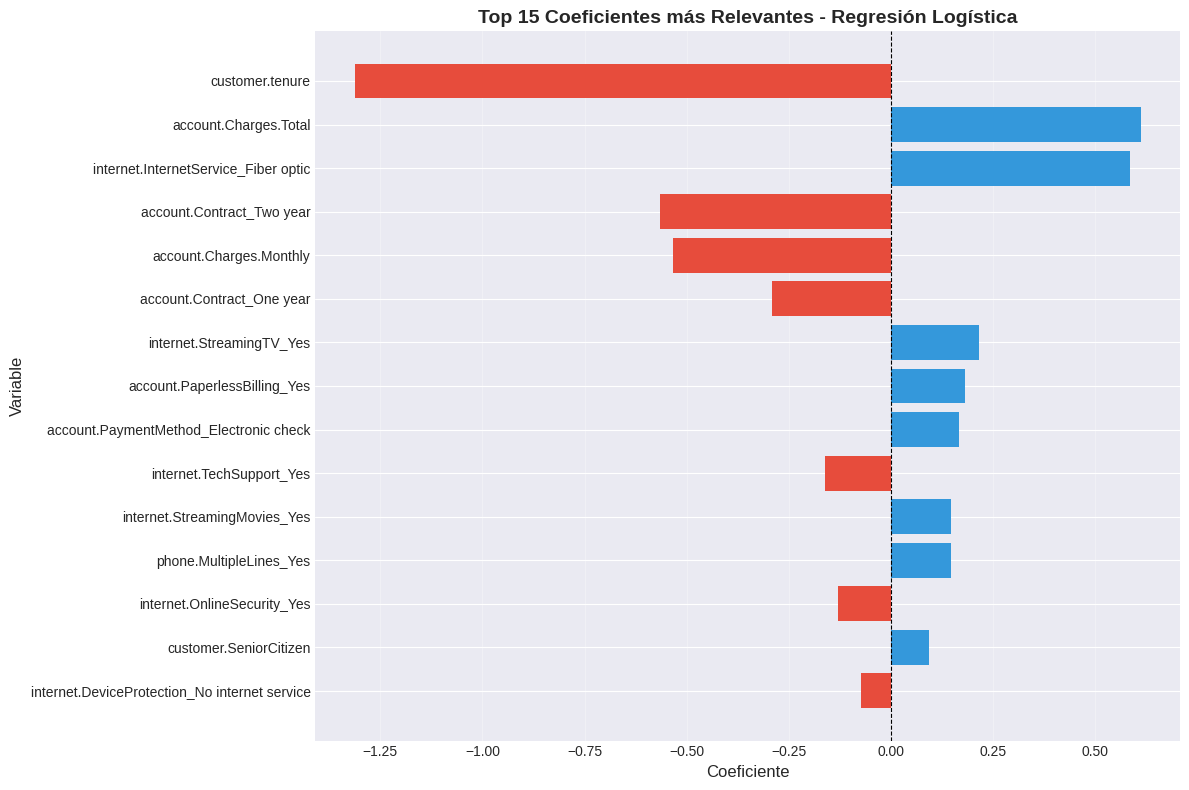


💡 Interpretación:
  • Coeficientes POSITIVOS (azul): Aumentan la probabilidad de churn
  • Coeficientes NEGATIVOS (rojo): Disminuyen la probabilidad de churn


In [67]:
# Coeficientes de Regresión Logística
log_reg_model = models['Logistic Regression']['model']
coefficients_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "=" * 60)
print("COEFICIENTES - REGRESIÓN LOGÍSTICA")
print("=" * 60)
print(coefficients_lr.head(15))

# Visualización
plt.figure(figsize=(12, 8))
top_coefficients = coefficients_lr.head(15)
colors = ['#e74c3c' if x < 0 else '#3498db' for x in top_coefficients['Coefficient']]
plt.barh(top_coefficients['Feature'], top_coefficients['Coefficient'], color=colors)
plt.xlabel('Coeficiente', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Top 15 Coeficientes más Relevantes - Regresión Logística', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print("  • Coeficientes POSITIVOS (azul): Aumentan la probabilidad de churn")
print("  • Coeficientes NEGATIVOS (rojo): Disminuyen la probabilidad de churn")

### 🌳 Importancia de Variables - Decision Tree


IMPORTANCIA DE VARIABLES - DECISION TREE
                                        Feature  Importance
1                               customer.tenure    0.292292
10         internet.InternetService_Fiber optic    0.192308
3                         account.Charges.Total    0.146671
2                       account.Charges.Monthly    0.140273
28       account.PaymentMethod_Electronic check    0.029698
4                          customer.gender_Male    0.019634
26                 account.PaperlessBilling_Yes    0.018108
12  internet.OnlineSecurity_No internet service    0.018100
24                    account.Contract_One year    0.017610
25                    account.Contract_Two year    0.017515
0                        customer.SeniorCitizen    0.012861
6                       customer.Dependents_Yes    0.012583
9                       phone.MultipleLines_Yes    0.012198
13                  internet.OnlineSecurity_Yes    0.011029
5                          customer.Partner_Yes    0.00887

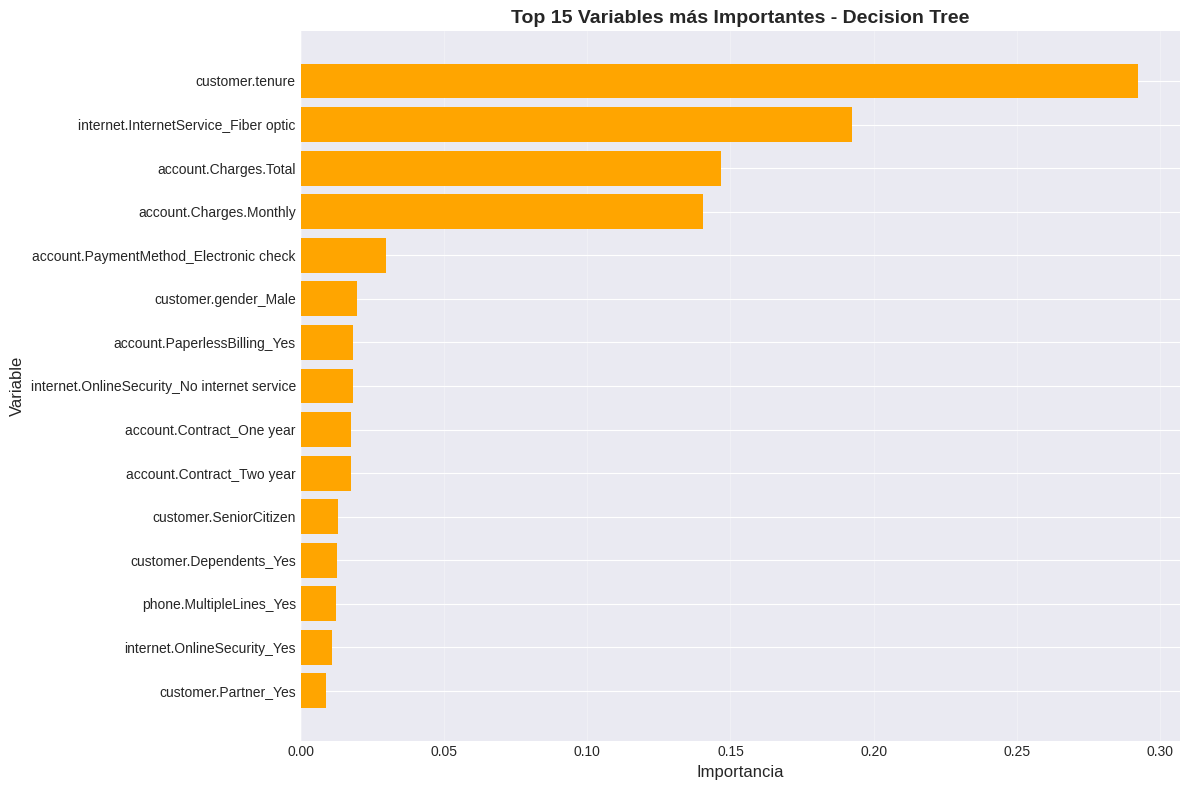

In [68]:
# Importancia de variables en Decision Tree
dt_model = models['Decision Tree']['model']
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "=" * 60)
print("IMPORTANCIA DE VARIABLES - DECISION TREE")
print("=" * 60)
print(feature_importance_dt.head(15))

# Visualización
plt.figure(figsize=(12, 8))
top_features_dt = feature_importance_dt.head(15)
plt.barh(top_features_dt['Feature'], top_features_dt['Importance'], color='orange')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Top 15 Variables más Importantes - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Comparación de Importancia entre Modelos

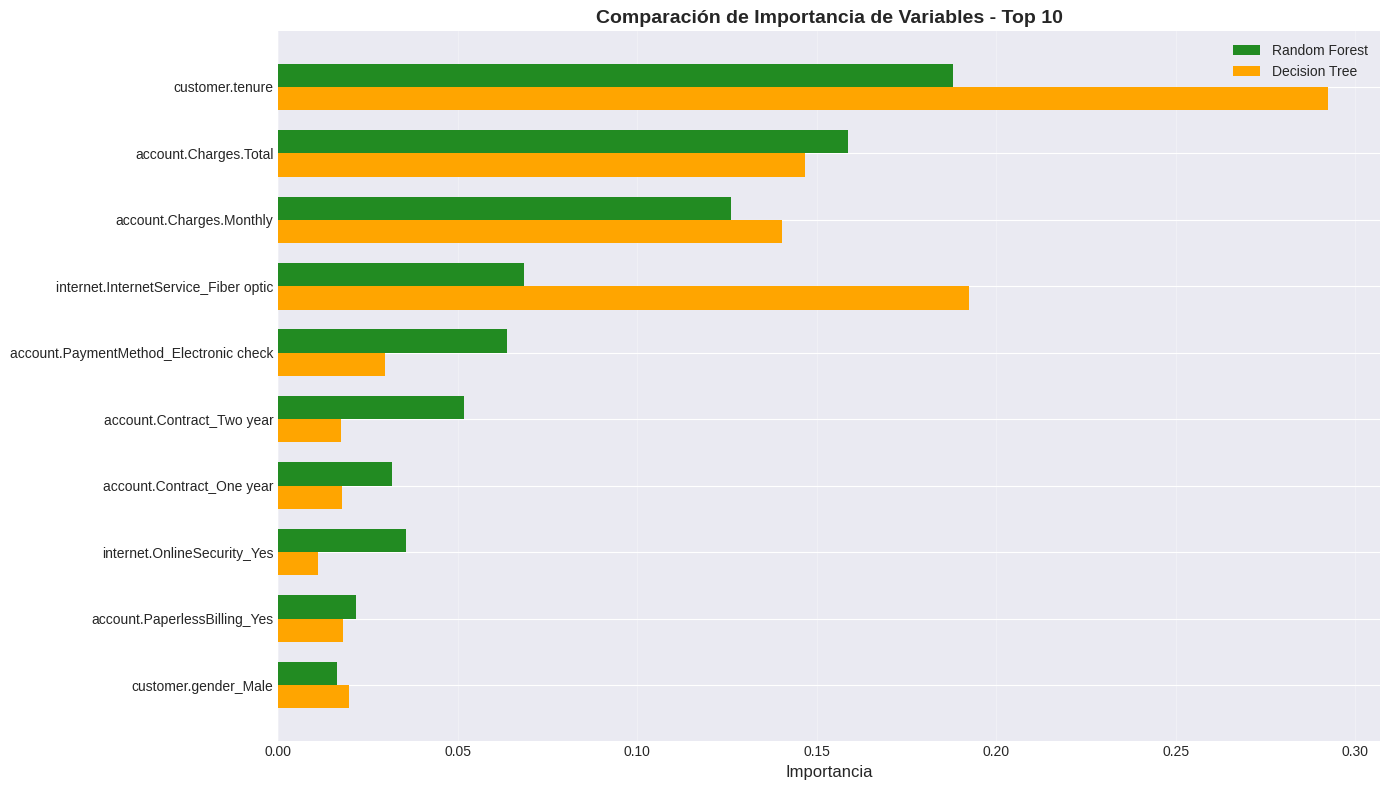


=
=
=
TOP 10 VARIABLES MÁS IMPORTANTES (PROMEDIO)
===


,Feature,Random Forest,Decision Tree,Total
0,customer.tenure,0.188044,0.292292,0.480336
1,account.Charges.Total,0.158579,0.146671,0.305250
2,account.Charges.Monthly,0.126055,0.140273,0.266327
3,internet.InternetService_Fiber optic,0.068467,0.192308,0.260775
4,account.PaymentMethod_Electronic check,0.063676,0.029698,0.093375
5,account.Contract_Two year,0.051790,0.017515,0.069304
6,account.Contract_One year,0.031572,0.017610,0.049182
7,internet.OnlineSecurity_Yes,0.035551,0.011029,0.046580
8,account.PaperlessBilling_Yes,0.021697,0.018108,0.039806
9,customer.gender_Male,0.016247,0.019634,0.035881


In [84]:
# Comparar las top 10 features de ambos modelos basados en árboles
comparison_importance = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest': rf_model.feature_importances_,
    'Decision Tree': dt_model.feature_importances_
})

# Ordenar por la suma de importancias
comparison_importance['Total'] = comparison_importance['Random Forest'] + comparison_importance['Decision Tree']
comparison_importance = comparison_importance.sort_values('Total', ascending=False).head(10)

# Visualización
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(comparison_importance))
width = 0.35

ax.barh(x - width/2, comparison_importance['Random Forest'], width, label='Random Forest', color='forestgreen')
ax.barh(x + width/2, comparison_importance['Decision Tree'], width, label='Decision Tree', color='orange')

ax.set_yticks(x)
ax.set_yticklabels(comparison_importance['Feature'])
ax.set_xlabel('Importancia', fontsize=12)
ax.set_title('Comparación de Importancia de Variables - Top 10', fontsize=14, fontweight='bold')
ax.legend()
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=" * 3)
print("TOP 10 VARIABLES MÁS IMPORTANTES (PROMEDIO)")
print("=" *3 )
display(comparison_importance[['Feature', 'Random Forest', 'Decision Tree', 'Total']].reset_index(drop=True))

## 2️⃣ Conclusiones y Recomendaciones Estratégicas

In [70]:
print("=" * 80)
print("📋 CONCLUSIONES Y RECOMENDACIONES ESTRATÉGICAS")
print("=" * 80)

print("\n🎯 1. RENDIMIENTO DE LOS MODELOS")
print("-" * 80)

# Mejor modelo
best_model = results_df['F1-Score'].idxmax()
best_f1 = results_df.loc[best_model, 'F1-Score']

print(f"\n• MEJOR MODELO: {best_model}")
print(f"  - F1-Score: {best_f1:.4f}")
print(f"  - Accuracy: {results_df.loc[best_model, 'Accuracy']:.4f}")
print(f"  - ROC-AUC: {results_df.loc[best_model, 'ROC-AUC']:.4f}")

print("\n• COMPARACIÓN GENERAL:")
for idx, row in results_df.iterrows():
    print(f"  - {idx}: F1={row['F1-Score']:.4f}, Accuracy={row['Accuracy']:.4f}")

print("\n\n🔍 2. PRINCIPALES FACTORES QUE INFLUYEN EN LA CANCELACIÓN")
print("-" * 80)

# Obtener top 5 features del mejor modelo (si es RF o DT)
if best_model in ['Random Forest', 'Decision Tree']:
    if best_model == 'Random Forest':
        top_features = feature_importance_rf.head(5)
    else:
        top_features = feature_importance_dt.head(5)

    print("\nLas 5 variables más influyentes en la predicción de churn son:\n")
    for i, row in top_features.iterrows():
        print(f"  {i+1}. {row['Feature']}: {row['Importance']:.4f}")

print("\n\n💡 3. RECOMENDACIONES ESTRATÉGICAS PARA RETENCIÓN DE CLIENTES")
print("-" * 80)

recommendations = [
    {
        'area': 'CONTRATOS Y FIDELIZACIÓN',
        'actions': [
            'Incentivar contratos de largo plazo (1-2 años) con descuentos atractivos',
            'Ofrecer beneficios progresivos por antigüedad',
            'Implementar programas de puntos y recompensas para clientes fieles'
        ]
    },
    {
        'area': 'SERVICIO AL CLIENTE',
        'actions': [
            'Mejorar el soporte técnico, especialmente en los primeros meses',
            'Ofrecer servicios de seguridad online sin costo adicional',
            'Implementar sistema de alertas tempranas para clientes en riesgo'
        ]
    },
    {
        'area': 'ESTRATEGIA DE PRECIOS',
        'actions': [
            'Revisar la estructura de precios mensuales',
            'Crear paquetes personalizados según el perfil del cliente',
            'Ofrecer descuentos proactivos a clientes de alto riesgo'
        ]
    },
    {
        'area': 'RETENCIÓN PROACTIVA',
        'actions': [
            'Usar el modelo predictivo para identificar clientes en riesgo mensualmente',
            'Contactar proactivamente a clientes con alta probabilidad de churn',
            'Implementar campañas de retención personalizadas'
        ]
    }
]

for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['area']}")
    for action in rec['actions']:
        print(f"   • {action}")

print("\n\n📊 4. PRÓXIMOS PASOS")
print("-" * 80)
next_steps = [
    'Implementar el modelo en producción para scoring mensual de clientes',
    'Establecer umbrales de probabilidad para diferentes niveles de intervención',
    'Realizar A/B testing de estrategias de retención',
    'Monitorear continuamente el desempeño del modelo y reentrenar periódicamente',
    'Integrar el modelo con el CRM para automatizar alertas',
    'Calcular el ROI de las campañas de retención basadas en el modelo'
]

for i, step in enumerate(next_steps, 1):
    print(f"\n{i}. {step}")

print("\n\n" + "=" * 80)
print("✅ ANÁLISIS COMPLETADO")
print("=" * 80)
print("\nEste modelo predictivo permite a Telecom X identificar proactivamente")
print("los clientes en riesgo de cancelación y tomar acciones preventivas,")
print("lo que resultará en una mayor retención y satisfacción del cliente.")
print("\n" + "=" * 80)

📋 CONCLUSIONES Y RECOMENDACIONES ESTRATÉGICAS

🎯 1. RENDIMIENTO DE LOS MODELOS
--------------------------------------------------------------------------------

• MEJOR MODELO: Logistic Regression
  - F1-Score: 0.5867
  - Accuracy: 0.8017
  - ROC-AUC: 0.8451

• COMPARACIÓN GENERAL:
  - Logistic Regression: F1=0.5867, Accuracy=0.8017
  - KNN: F1=0.5287, Accuracy=0.7605
  - Random Forest: F1=0.5564, Accuracy=0.7960
  - Decision Tree: F1=0.5110, Accuracy=0.7633


🔍 2. PRINCIPALES FACTORES QUE INFLUYEN EN LA CANCELACIÓN
--------------------------------------------------------------------------------


💡 3. RECOMENDACIONES ESTRATÉGICAS PARA RETENCIÓN DE CLIENTES
--------------------------------------------------------------------------------

1. CONTRATOS Y FIDELIZACIÓN
   • Incentivar contratos de largo plazo (1-2 años) con descuentos atractivos
   • Ofrecer beneficios progresivos por antigüedad
   • Implementar programas de puntos y recompensas para clientes fieles

2. SERVICIO AL CLIENTE

## 📊 Resumen Ejecutivo

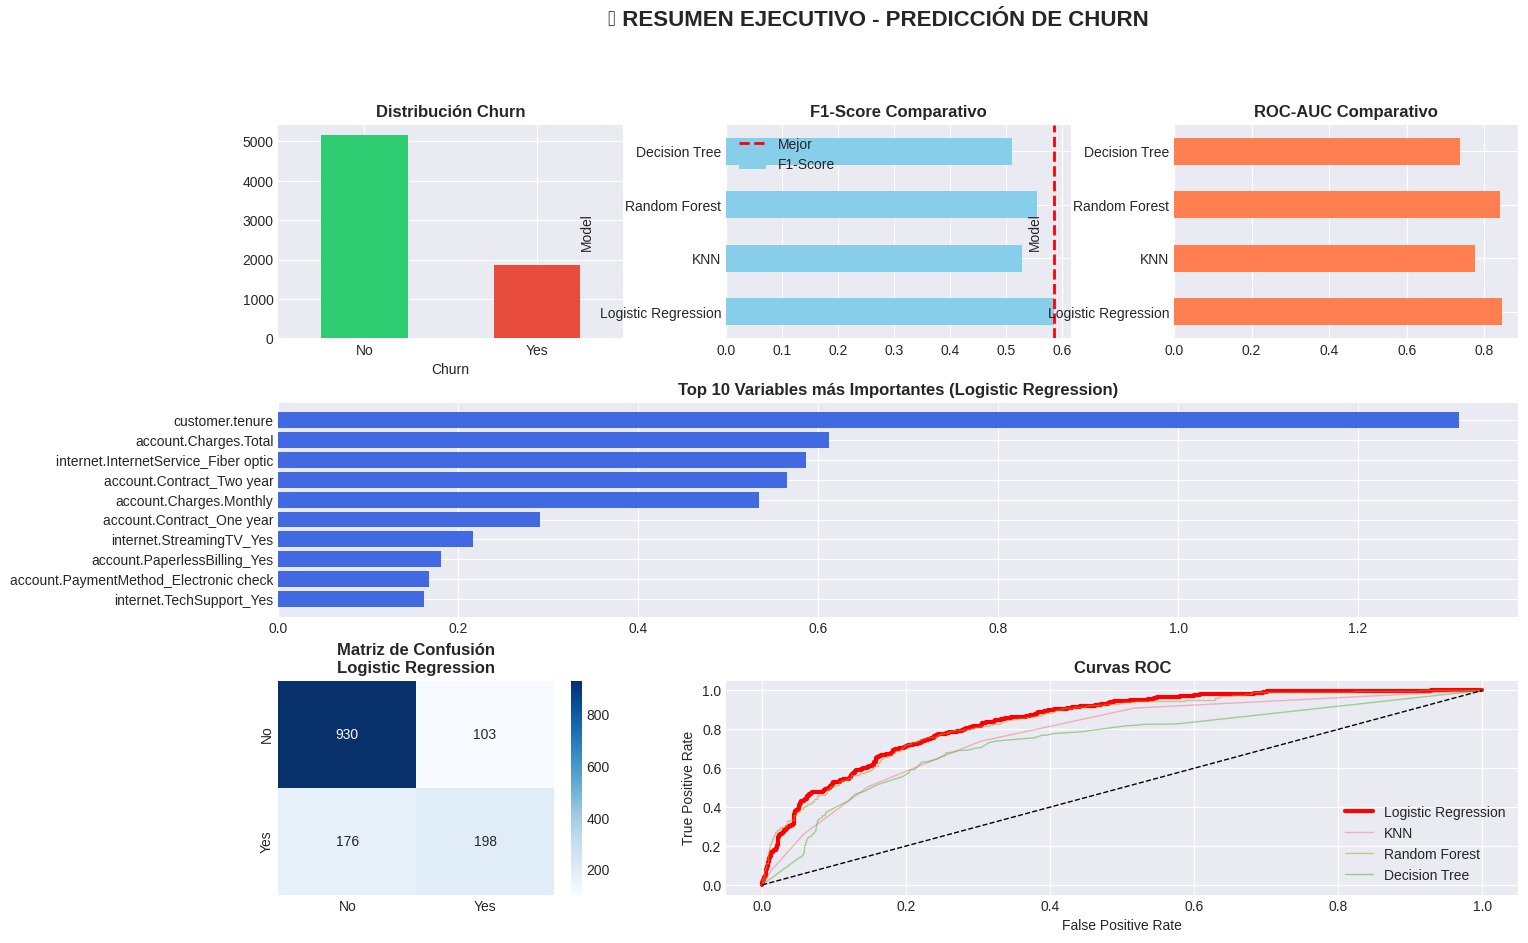

In [74]:
# ======================================
# RESUMEN EJECUTIVO VISUAL (COMPLETO)
# ======================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve

# ======================================================
# IMPORTANCIA DE VARIABLES (SE DEFINE AQUÍ MISMO)
# ======================================================

# Logistic Regression
log_reg_model = models['Logistic Regression']['model']
feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg_model.coef_[0])
}).sort_values(by='Importance', ascending=False)

# Random Forest (si existe)
if 'Random Forest' in models:
    rf_model = models['Random Forest']['model']
    feature_importance_rf = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

# Decision Tree (si existe)
if 'Decision Tree' in models:
    dt_model = models['Decision Tree']['model']
    feature_importance_dt = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': dt_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

# ======================================================
# CREAR FIGURA
# ======================================================

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Distribución de Churn
ax1 = fig.add_subplot(gs[0, 0])
churn_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Distribución Churn', fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# 2. F1-Score comparativo
ax2 = fig.add_subplot(gs[0, 1])
results_df['F1-Score'].plot(kind='barh', ax=ax2, color='skyblue')
ax2.set_title('F1-Score Comparativo', fontweight='bold')
ax2.axvline(x=best_f1, color='red', linestyle='--', linewidth=2, label='Mejor')
ax2.legend()

# 3. ROC-AUC comparativo
ax3 = fig.add_subplot(gs[0, 2])
results_df['ROC-AUC'].plot(kind='barh', ax=ax3, color='coral')
ax3.set_title('ROC-AUC Comparativo', fontweight='bold')

# 4. Top 10 Variables más Importantes (YA FUNCIONA)
ax4 = fig.add_subplot(gs[1, :])

if best_model == 'Random Forest':
    top_10 = feature_importance_rf.head(10)
    ax4.barh(top_10['Feature'], top_10['Importance'], color='forestgreen')

elif best_model == 'Decision Tree':
    top_10 = feature_importance_dt.head(10)
    ax4.barh(top_10['Feature'], top_10['Importance'], color='orange')

elif best_model == 'Logistic Regression':
    top_10 = feature_importance_lr.head(10)
    ax4.barh(top_10['Feature'], top_10['Importance'], color='royalblue')

ax4.set_title(f'Top 10 Variables más Importantes ({best_model})', fontweight='bold')
ax4.invert_yaxis()

# 5. Matriz de confusión
ax5 = fig.add_subplot(gs[2, 0])
best_cm = confusion_matrix(y_test, models[best_model]['predictions'])
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', ax=ax5,
            xticklabels=target_names, yticklabels=target_names)
ax5.set_title(f'Matriz de Confusión\n{best_model}', fontweight='bold')

# 6. Curvas ROC
ax6 = fig.add_subplot(gs[2, 1:])
for model_name, model_info in models.items():
    fpr, tpr, _ = roc_curve(y_test, model_info['probabilities'])
    if model_name == best_model:
        ax6.plot(fpr, tpr, label=model_name, linewidth=3, color='red')
    else:
        ax6.plot(fpr, tpr, label=model_name, linewidth=1, alpha=0.5)

ax6.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax6.set_title('Curvas ROC', fontweight='bold')
ax6.legend(loc='lower right')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')

fig.suptitle('📊 RESUMEN EJECUTIVO - PREDICCIÓN DE CHURN',
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()


## 💾 Guardar el Mejor Modelo (opcional)

In [75]:
# Guardar el mejor modelo y el scaler
import pickle

# Guardar modelo
best_model_obj = models[best_model]['model']
with open(f'best_model_{best_model.replace(" ", "_").lower()}.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)

# Guardar scaler si es necesario
if models[best_model]['scaled']:
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)

print(f"✅ Modelo guardado: best_model_{best_model.replace(' ', '_').lower()}.pkl")
if models[best_model]['scaled']:
    print("✅ Scaler guardado: scaler.pkl")

print("\n📝 Para usar el modelo en el futuro:")
print("   import pickle")
print(f"   with open('best_model_{best_model.replace(' ', '_').lower()}.pkl', 'rb') as f:")
print("       model = pickle.load(f)")
if models[best_model]['scaled']:
    print("   with open('scaler.pkl', 'rb') as f:")
    print("       scaler = pickle.load(f)")

✅ Modelo guardado: best_model_logistic_regression.pkl
✅ Scaler guardado: scaler.pkl

📝 Para usar el modelo en el futuro:
   import pickle
   with open('best_model_logistic_regression.pkl', 'rb') as f:
       model = pickle.load(f)
   with open('scaler.pkl', 'rb') as f:
       scaler = pickle.load(f)


---



## 📚 Recursos adicionales:
- [Documentación de scikit-learn](https://scikit-learn.org/)
- [Documentación de pandas](https://pandas.pydata.org/docs/)
- [Artículos de Alura sobre Machine Learning](https://www.alura.com.br/)

---